In [1]:
import pandas as pd
import numpy as np
import random
random.seed(10)
import matplotlib.pyplot as plt

In [16]:
WorkingData = pd.read_csv("Dataset2.csv")
actWorkingData = WorkingData.drop('Country',axis=1)

,Unnamed: 0,CH4,SF6,HFC,PFC,NO2,CO2
0,0,98903.81712,136.861720,10444.590890,303.142019,18800.57345,4.165635e+05
1,1,105111.44760,145.265400,9273.449152,236.002704,19626.06870,4.153397e+05
2,2,104363.55460,115.357167,9250.631509,202.625537,20800.03484,4.145978e+05
3,3,102675.20730,117.125146,9218.702440,224.924134,19083.38678,4.109685e+05
4,4,103029.59930,116.172156,9166.519961,171.323657,19080.91113,4.014993e+05
...,...,...,...,...,...,...,...
1007,1007,307422.14140,12.647912,15921.050250,17965.003960,72822.53045,1.495694e+06
1008,1008,310366.72600,11.472869,17420.516160,19484.617790,72941.49046,1.507707e+06
1009,1009,309824.22580,11.163929,16409.641350,19481.087040,73404.72712,1.471259e+06
1010,1010,306161.67970,10.154710,14363.665010,20912.457840,71662.09233,1.486301e+06


In [17]:
X = actWorkingData.iloc[:,1:6]
y = actWorkingData.iloc[:,6]

In [21]:
print(X)
print(y)

               CH4         SF6           HFC           PFC          NO2
0      98903.81712  136.861720  10444.590890    303.142019  18800.57345
1     105111.44760  145.265400   9273.449152    236.002704  19626.06870
2     104363.55460  115.357167   9250.631509    202.625537  20800.03484
3     102675.20730  117.125146   9218.702440    224.924134  19083.38678
4     103029.59930  116.172156   9166.519961    171.323657  19080.91113
...            ...         ...           ...           ...          ...
1007  307422.14140   12.647912  15921.050250  17965.003960  72822.53045
1008  310366.72600   11.472869  17420.516160  19484.617790  72941.49046
1009  309824.22580   11.163929  16409.641350  19481.087040  73404.72712
1010  306161.67970   10.154710  14363.665010  20912.457840  71662.09233
1011  304055.48520   17.623716  11752.197280  24255.671540  72572.95489

[1012 rows x 5 columns]
0       4.165635e+05
1       4.153397e+05
2       4.145978e+05
3       4.109685e+05
4       4.014993e+05
      

In [22]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
import numpy as np
clf = tree.DecisionTreeRegressor(max_depth=9)
scores = cross_validate(clf, X, y, cv=3, scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)



In [23]:
print(scores['train_r2'])
print(scores['test_r2'])
import numpy as np
print(np.mean(scores['test_r2']))

[0.99997184 0.99987098 0.99994655]
[ 0.97115293  0.86639213 -0.33347867]
0.5013554614556341


In [24]:
import numpy as np    
for i in range(1,10):
    clf = tree.DecisionTreeRegressor(max_depth=i)
    scores = cross_validate(clf, X, y, cv=3, scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
    print(np.mean(scores['test_r2']))

-0.13842487418400853
0.28864053907158876
0.38468208352626904
0.49338107220573374
0.4702169736810198
0.4571292121234625
0.4926638360717977
0.4672144518637554
0.49461625802954906


In [25]:
newX = X.iloc[:,[0]]
print(newX)

               CH4
0      98903.81712
1     105111.44760
2     104363.55460
3     102675.20730
4     103029.59930
...            ...
1007  307422.14140
1008  310366.72600
1009  309824.22580
1010  306161.67970
1011  304055.48520

[1012 rows x 1 columns]


In [26]:
f = []
f.append(3)

In [27]:
f.remove(3)

In [28]:
print(f)

[]


In [29]:
seen = []
columns = [0,1,2,3,4]
toUse = []
rsq = []
stop = 0
while(stop==0):
    r2 = -10000
    for i in columns:
        toUse.append(i)
        print("Using " + str(toUse))
        newX = X.iloc[:,toUse]
        clf = tree.DecisionTreeRegressor(max_depth=5)
        scores = cross_validate(clf, newX, y, cv=3, scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
        newR2 = np.mean(scores['test_r2'])
        print("TEST R2 FOR COLUMN " + str(i) + "IS " + str(newR2))
        if(newR2 > r2):
            r2 = newR2
            idealCol = i
        toUse.remove(i)
    toUse.append(idealCol)
    print("CHOSEN COLUMNS ARE " + str(toUse))
    rsq.append(r2)
    print("CHOSEN R2 IS " + str(rsq))
    columns.remove(idealCol)
    if len(toUse)==5:
        stop+=1
        

    
        
        
        
        
    

Using [0]
TEST R2 FOR COLUMN 0IS -0.05195582289939349
Using [1]
TEST R2 FOR COLUMN 1IS 0.23206166739707731
Using [2]
TEST R2 FOR COLUMN 2IS -1.3329474915988395
Using [3]
TEST R2 FOR COLUMN 3IS -1.0277525540657848
Using [4]
TEST R2 FOR COLUMN 4IS 0.6039902900019786
CHOSEN COLUMNS ARE [4]
CHOSEN R2 IS [0.6039902900019786]
Using [4, 0]
TEST R2 FOR COLUMN 0IS 0.4731741046653893
Using [4, 1]
TEST R2 FOR COLUMN 1IS 0.7001996934786786
Using [4, 2]
TEST R2 FOR COLUMN 2IS 0.7213319022236572
Using [4, 3]
TEST R2 FOR COLUMN 3IS 0.6862368406247109
CHOSEN COLUMNS ARE [4, 2]
CHOSEN R2 IS [0.6039902900019786, 0.7213319022236572]
Using [4, 2, 0]
TEST R2 FOR COLUMN 0IS 0.4640829875315003
Using [4, 2, 1]
TEST R2 FOR COLUMN 1IS 0.6324230864783676
Using [4, 2, 3]
TEST R2 FOR COLUMN 3IS 0.8123098533041858
CHOSEN COLUMNS ARE [4, 2, 3]
CHOSEN R2 IS [0.6039902900019786, 0.7213319022236572, 0.8123098533041858]
Using [4, 2, 3, 0]
TEST R2 FOR COLUMN 0IS 0.4988817528876193
Using [4, 2, 3, 1]
TEST R2 FOR COLUMN 1I

[0.6039902900019786, 0.7213319022236572, 0.8123098533041858, 0.6074977257262694, 0.47556471735217737]


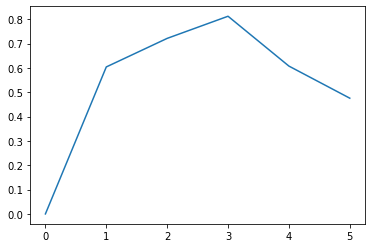

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
toUseNow = [0,1,2,3,4,5]
print(rsq)
rsq.insert(0,0)
plt.plot(toUseNow,rsq)
plt.show()
plt.savefig('4360DTgraph2.png')

In [31]:
trueX = X.iloc[:,[3,1,2]]
clf = tree.DecisionTreeRegressor(max_depth=5)
scores = cross_validate(clf, trueX, y, cv=3, scoring=('r2', 'neg_mean_squared_error'),
        return_train_score=True)
newR2 = np.mean(scores['test_r2'])
print(str(newR2))

-0.024742620238125124


In [32]:
clf.fit(trueX,y)

DecisionTreeRegressor(max_depth=5)

[Text(178.22327586206896, 199.32, 'X[1] <= 6084.708\nmse = 538179434013.567\nsamples = 1012\nvalue = 313666.585'),
 Text(92.35862068965517, 163.07999999999998, 'X[1] <= 2194.99\nmse = 207399475350.964\nsamples = 968\nvalue = 211548.156'),
 Text(46.179310344827584, 126.83999999999999, 'X[2] <= 4466.625\nmse = 195457997686.758\nsamples = 905\nvalue = 176357.188'),
 Text(23.089655172413792, 90.6, 'X[1] <= 4.909\nmse = 57513959052.637\nsamples = 695\nvalue = 124394.885'),
 Text(11.544827586206896, 54.359999999999985, 'X[2] <= 49.303\nmse = 973193231.733\nsamples = 204\nvalue = 26860.761'),
 Text(5.772413793103448, 18.119999999999976, 'mse = 52890264.689\nsamples = 66\nvalue = 9381.901'),
 Text(17.317241379310346, 18.119999999999976, 'mse = 1197343914.626\nsamples = 138\nvalue = 35220.216'),
 Text(34.63448275862069, 54.359999999999985, 'X[1] <= 5.014\nmse = 75410888062.007\nsamples = 491\nvalue = 164918.228'),
 Text(28.86206896551724, 18.119999999999976, 'mse = 2213800610.43\nsamples = 4\nv

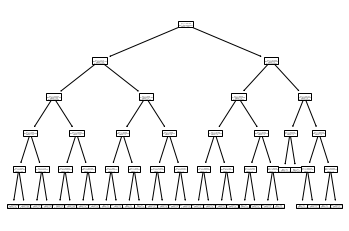

In [33]:
tree.plot_tree(clf)